# Python: Intermediate
## Visualizing Geographical Data

In this notebook, we will explore how to visualize the data on maps.We will explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the openflights website. Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

airlines.csv - data on each airline.

country - where the airline is headquartered.
active - if the airline is still active.

airports.csv - data on each airport.

name - name of the airport.
city - city the airport is located.
country - country the airport is located.
code - unique airport code.
latitude - latitude value.
longitude - longitude value.

routes.csv - data on each flight route.

airline - airline for the route.
source - starting city for the route.
dest - destination city for the route.

geo_routes.csv - contains the latitude and longitude values corresponding to the source and destination airports for each route. 

In [1]:
import pandas as pd
airlines = pd.read_csv("Visualizing Geographic Data\\airlines.csv")
airports = pd.read_csv("Visualizing Geographic Data\\airports.csv")
routes = pd.read_csv("Visualizing Geographic Data\\routes.csv")
geo_routes = pd.read_csv("Visualizing Geographic Data\\geo_routes.csv")
                  

In [2]:
airlines.iloc[1] 

id                      2
name          135 Airways
alias                  \N
iata                  NaN
icao                  GNL
callsign          GENERAL
country     United States
active                  N
Name: 1, dtype: object

In [3]:
airports.iloc[1]


id                              2
name                       Madang
city                       Madang
country          Papua New Guinea
code                          MAG
icao                         AYMD
latitude                 -5.20708
longitude                 145.789
altitude                       20
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 1, dtype: object

In [4]:
routes.iloc[1]

airline         2B
airline_id     410
source         ASF
source_id     2966
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 1, dtype: object

In [5]:
geo_routes.iloc[1]

airline           2B
source           ASF
dest             KZN
equipment        CR2
start_lon    48.0063
end_lon      49.2787
start_lat    46.2833
end_lat      55.6062
Name: 1, dtype: object

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [7]:
# create a new basemap instance
m = Basemap(projection="merc",llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)

In [8]:
# Converting From Spherical to Cartesian Coordinates
# First convert airport longitude and latitude columns tolist and pass to Basemap constructors
# x and y are converted corodinates list objects
longitudes = airports.longitude.tolist()
latitudes = airports.latitude.tolist()
x, y = m(longitudes,latitudes)

C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


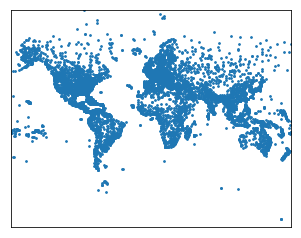

In [9]:
# generate scatter map
m.scatter(x,y,s=3);
plt.show()

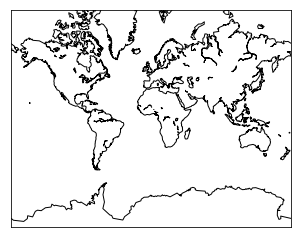

In [10]:
# draw coast lines
m.drawcoastlines();

C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


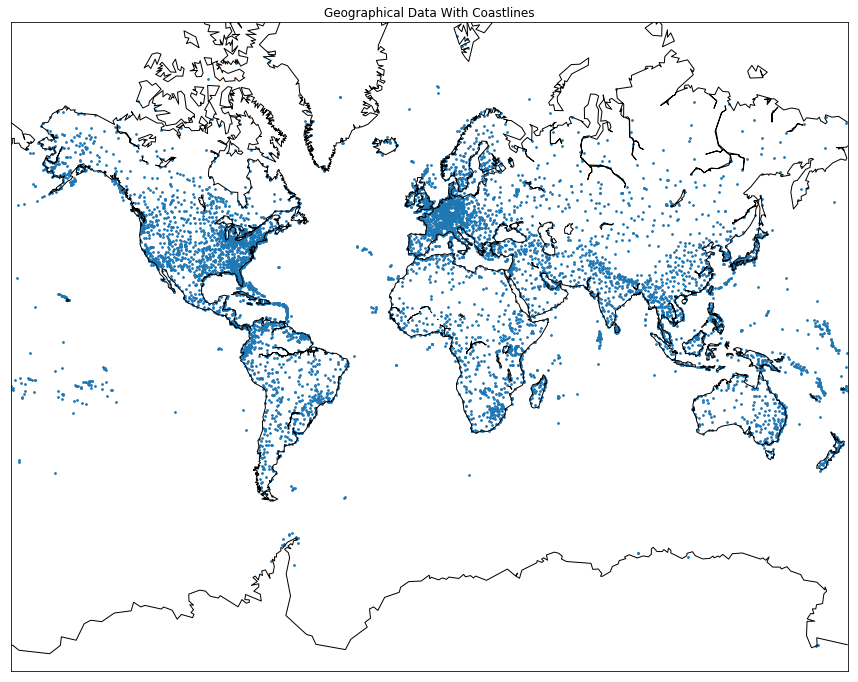

In [11]:
# use Figure and Axes objects
fig, axe = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports.longitude.tolist()
latitudes = airports.latitude.tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=3)
m.drawcoastlines()
plt.title("Geographical Data With Coastlines")
plt.show()



In [12]:
# look for any null objects in geo_routes
geo_routes.info() 
print(geo_routes.head());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


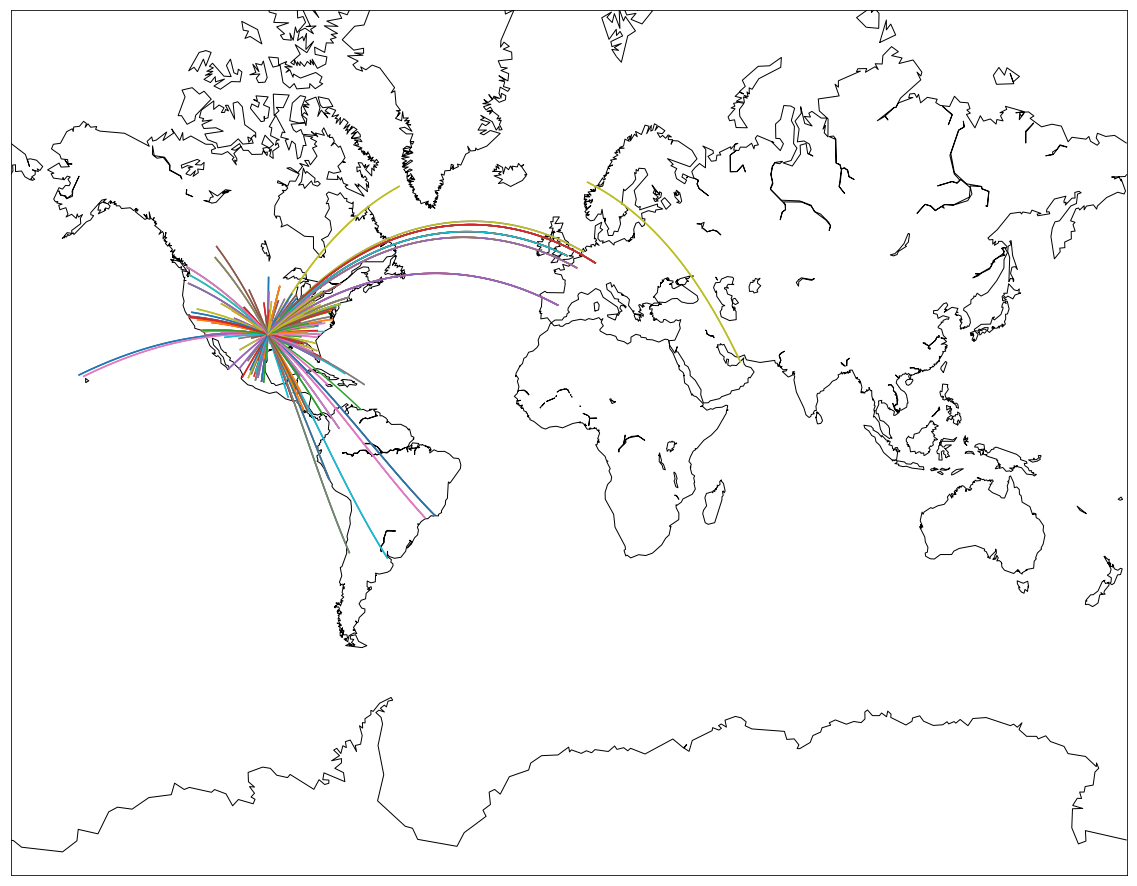

In [17]:
# Create great circles to connect starting and ending locations on a map

fig, ax = plt.subplots(figsize=(20,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for i, row in df.iterrows():
        end_lat  = row.end_lat 
        start_lat = row.start_lat
        end_lon  = row.end_lon 
        start_lon = row.start_lon
        
        if (abs(end_lat - start_lat) < 180 and abs(end_lon - start_lon) < 180):
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw);  
    